# 로또 당첨 데이터

로또 회차별 당첨번호 페이지[[link]](https://dhlottery.co.kr/gameResult.do?method=byWin) 에서 1회차 부터 최근 회차 까지 회차별로 `날짜`, `당첨번호`(보너스 번호 포함) 그리고 `총판매 금액`을 모아서 'csv' 파일로 저장해보자 

- column 명
    - 날짜: data
    - 당첨번호 6자리 
        - w1, w2, w3, w4, w5, w6
    - 보너스 번호
        - w7
    - 총판매금액
        - totalbet

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
URL = "https://dhlottery.co.kr/gameResult.do?method=byWin"

data = {
    "drwNo" : "968",
    "dwrNoList" : "968"
}

params = {
    "method" : "byWin"
}

response = requests.post(URL, data=data, params=params)

In [ ]:
response.text

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta charset="EUC-KR">\r\n<meta id="utitle" name="title" content="동행복권">\r\n<meta id="desc" name="description" content="동행복권 968회 당첨번호 2,5,12,14,24,39+33. 1등 총 13명, 1인당 당첨금액 1,667,729,683원.">\r\n<title>로또6/45 - 회차별 당첨번호</title>\r\n<title>동행복권</title>\r\n\r\n    \r\n    \r\n        \r\n\r\n\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<link rel="shortcut icon" href="/images/common/favicon.ico" type="image/x-icon">\r\n<link rel="icon" href="/images/common/favicon.ico" type="image/x-icon">\r\n<script type="text/javascript" src="/js/jquery-1.9.1.min.js"></script>\r\n<script type="text/javascript" src="/js/jquery-ui.js"></script>\r\n<script type="text/javascript" src="/js/common.js" charset="utf-8"></script>\r\n<script type="text/javascript">\r\n\r\nfn_g_init_message("");\r\n\r\nvar gameUserId = "";\r\n\r\nfunction goGame(){\r\n\tvar userId = "";\r\n\t\r\

In [ ]:
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [ ]:
response

<Response [200]>

In [ ]:
'''def get_numbers():
    for lotto in soup.select("span.lrg"):
        lotto_num = lotto.text
        print(lotto_num)
        
get_numbers()'''

'def get_numbers():\n    for lotto in soup.select("span.lrg"):\n        lotto_num = lotto.text\n        print(lotto_num)\n        \nget_numbers()'

### ex) 아래 처럼 데이터를 모아 저장하는 것이 목표다.

In [ ]:
print(df.head().to_markdown())

|    | date       |   w1 |   w2 |   w3 |   w4 |   w5 |   w6 |   w7 | total_bet     |
|---:|:-----------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|:--------------|
|  0 | 2002-12-07 |   10 |   23 |   29 |   33 |   37 |   40 |   16 | 3,681,782,000 |
|  1 | 2002-12-14 |    9 |   13 |   21 |   25 |   32 |   42 |    2 | 4,904,274,000 |
|  2 | 2002-12-21 |   11 |   16 |   19 |   21 |   27 |   31 |   30 | 4,729,342,000 |
|  3 | 2002-12-28 |   14 |   27 |   30 |   31 |   40 |   42 |    2 | 5,271,464,000 |
|  4 | 2003-01-04 |   16 |   24 |   29 |   40 |   41 |   42 |    3 | 6,277,102,000 |


## 1. 저장시킨 csv 파일을 Pandas 로 불러 오자

In [ ]:
pd.read_csv("/content/drive/MyDrive/data/lottery_winning_results(1~968).csv")

,date,w1,w2,w3,w4,w5,w6,w7,total_bet
0,2002-12-07,10,23,29,33,37,40,16,"3,681,782,000"
1,2002-12-14,9,13,21,25,32,42,2,"4,904,274,000"
2,2002-12-21,11,16,19,21,27,31,30,"4,729,342,000"
3,2002-12-28,14,27,30,31,40,42,2,"5,271,464,000"
4,2003-01-04,16,24,29,40,41,42,3,"6,277,102,000"
...,...,...,...,...,...,...,...,...,...
963,2021-05-22,6,21,36,38,39,43,30,"95,549,895,000"
964,2021-05-29,2,13,25,28,29,36,34,"96,174,650,000"
965,2021-06-05,1,21,25,29,34,37,36,"95,640,447,000"
966,2021-06-12,1,6,13,37,38,40,9,"94,515,565,000"


## 2. `w7` 이라는 컬럼명을 `bonus`로 바꾸어 보자

In [ ]:
df.rename({'w7' : 'bonus'}, axis="columns")
df.head(1)

,w1,w2,w3,w4,w5,w6,w7,total_bet,oe
date,,,,,,,,,
2002-12-07,10,23,29,33,37,40,16,3681782000,odd


## 3. `total_bet` 데이터를 숫자타입(numeric type)으로 바꾸어 보자. 

In [ ]:
df['total_bet'] = df['total_bet'].str.replace(',','').astype(int)

## 4. `total_bet`의 중간값, 평균, 표준편차, 최대 최소, 1분위, 2분위, 3분위 값을 구해보자.

In [ ]:
df['total_bet'].describe()

count    9.680000e+02
mean     6.134892e+10
std      1.762560e+10
min      3.681782e+09
25%      4.800671e+10
50%      5.773882e+10
75%      7.224930e+10
max      2.608564e+11
Name: total_bet, dtype: float64

## 5. `date` 컬럼의 데이터 값을 timeseries 타입으로 바꾸어보자.

## 6.`date` 컬럼을 데이터 프레임의 인덱스로 설정 해보자.

## 7. 시간에 따른 로또 당첨금액의 그래프를 그려보고, 패턴이 있는지 살펴보자

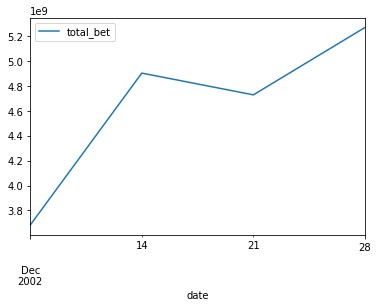

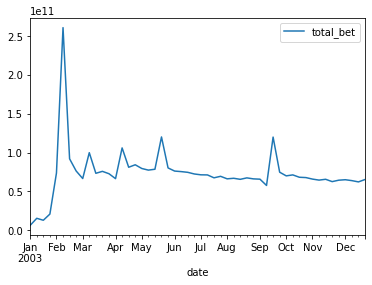

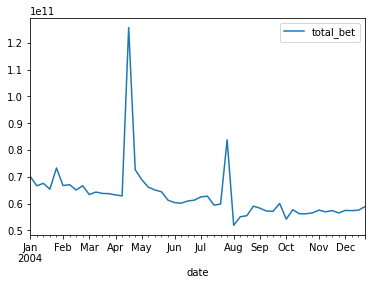

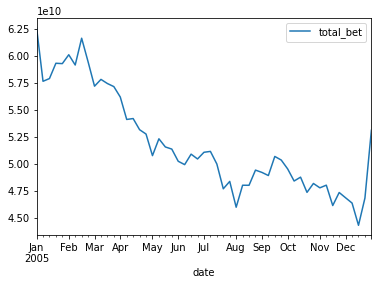

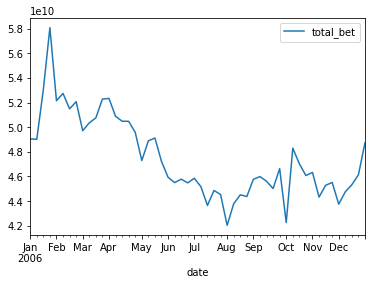

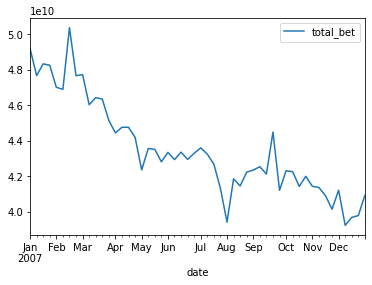

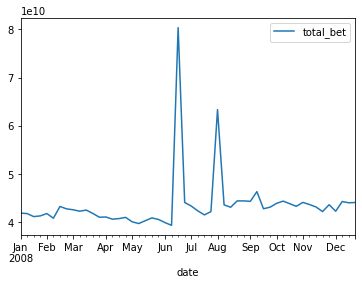

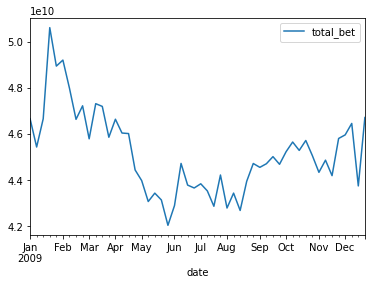

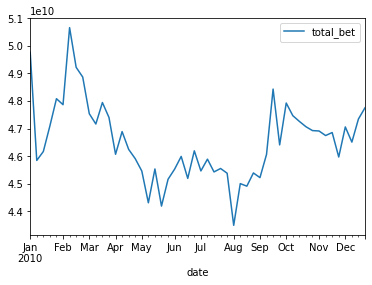

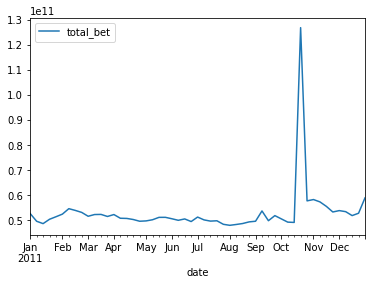

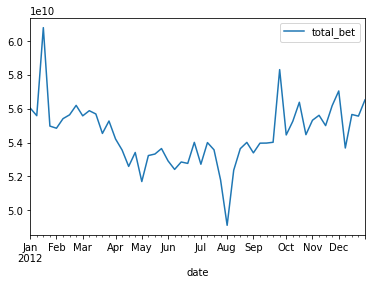

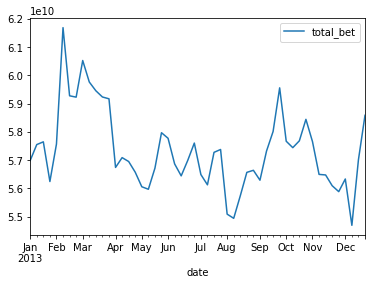

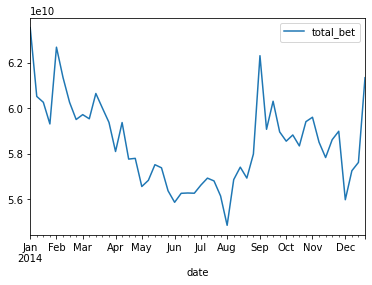

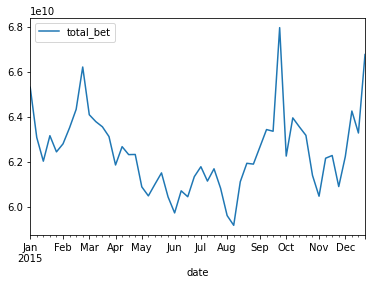

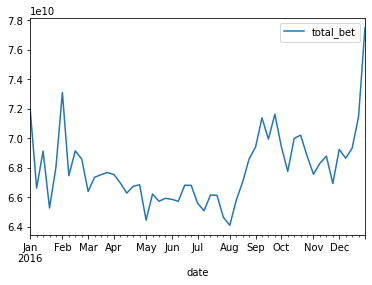

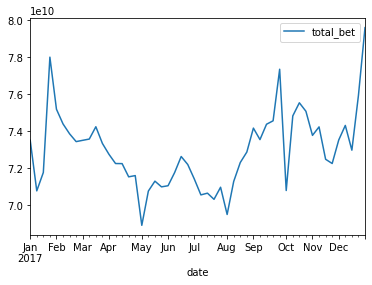

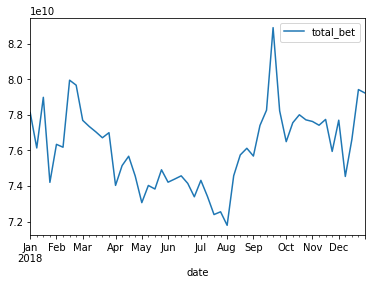

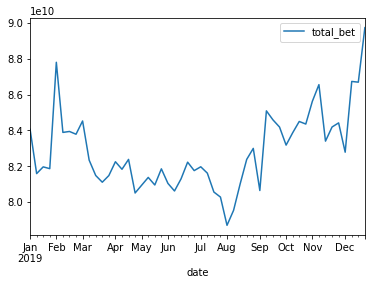

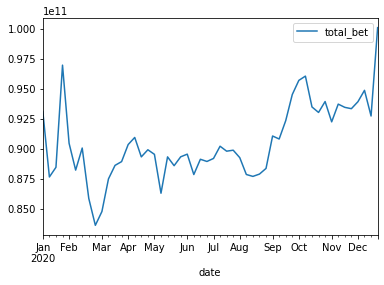

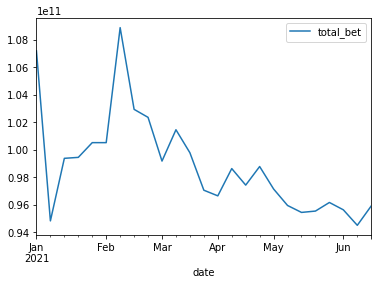

In [ ]:
for by_year, gdf in df.groupby(df.index.year):
    gdf[['total_bet']].plot()

date
2012-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2016-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: total_bet, dtype: object

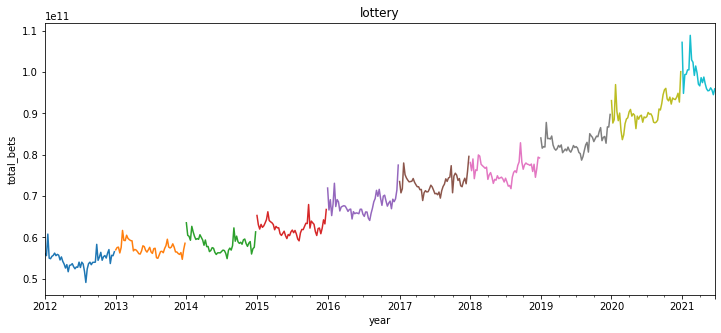

In [ ]:
df.loc['2012':].resample('Y').total_bet.plot(
    title="lottery", figsize=(12,5),
    xlabel="year", ylabel="total_bets"
)

## 8. 가장 최근 당첨결과가 테이블 최상단에 오도록 정렬해보자

In [ ]:
df.sort_index(axis="index", ascending=False)[:5]

,w1,w2,w3,w4,w5,w6,w7,total_bet
date,,,,,,,,
2021-06-19,2,5,12,14,24,39,33,95924229000
2021-06-12,1,6,13,37,38,40,9,94515565000
2021-06-05,1,21,25,29,34,37,36,95640447000
2021-05-29,2,13,25,28,29,36,34,96174650000
2021-05-22,6,21,36,38,39,43,30,95549895000


## 9. 로또 판매금액이 많은 순서대로 테이블을 정렬해보자

In [ ]:
df.sort_values("total_bet",ascending=False)[:5]

,w1,w2,w3,w4,w5,w6,w7,total_bet
date,,,,,,,,
2003-02-08,9,25,30,33,41,44,6,260856392000
2011-10-22,6,12,15,34,42,44,4,126772274000
2004-04-17,2,4,11,17,26,27,1,125651214000
2003-05-24,2,4,21,26,43,44,16,120073768000
2003-09-20,17,18,19,21,23,32,1,119909740000


## 10. 올해 이후의 당첨결과를 출력해보자

In [ ]:
df['2021':]

,w1,w2,w3,w4,w5,w6,w7,total_bet
date,,,,,,,,
2021-01-02,2,13,16,19,32,33,42,107181377000
2021-01-09,9,10,15,30,33,37,26,94837109000
2021-01-16,9,18,19,30,34,40,20,99380178000
2021-01-23,3,8,17,20,27,35,26,99449916000
2021-01-30,13,18,30,31,38,41,5,100519459000
2021-02-06,14,21,35,36,40,44,30,100518909000
2021-02-13,3,4,15,22,28,40,10,108870714000
2021-02-20,2,12,30,31,39,43,38,102937006000
2021-02-27,4,12,22,24,33,41,38,102355646000


## 11. 홀수가 나온날이 많은가? 짝수가 나온날이 많은가?

In [ ]:
odd = df.loc[:, 'w1':'w6'].applymap(lambda x: x%2==1).sum(axis=1)
even = df.loc[:, 'w1':'w6'].applymap(lambda x: x%2!=1).sum(axis=1)

In [ ]:
sum(odd==even), sum(odd>even), sum(odd<even)

(338, 336, 294)

## 12. 짝수가 많이 나온날과, 홀수가 많이 나온날의 복권판매금액의 중간값은 어느것이 더 큰 가?

In [ ]:
odd_condition = odd>even
even_condition = even>odd

df.loc[odd_condition, 'oe']='odd'
df.loc[even_condition, 'oe']='even'

In [ ]:
df.oe.fillna('random', inplace=True)

In [ ]:
sum(df.oe.isna())

338

In [ ]:
df.groupby('oe').total_bet.median()

oe
even      57624082500
odd       57639884500
random    57977357500
Name: total_bet, dtype: int64

## 13. 각 추첨에서 정말 같은 번호가 나온적이 없는지 확인해보자

두가지로 나누어서 파악해보자

- 당첨번호만 (6자리)
- 당첨번호 + 보너스까지 (7자리)

예) 보너스번호를 제외해서 본 경우, [1, 1, 2, 3, 4, 5] -> '1' 이 중복된 경우

참고로) 실제론 일어날 수 없는 경우다. 하지만 일어날 뻔 했던 유명한 로또 방송사고가있다.[[youtube]](https://www.youtube.com/watch?v=qqV5wYyDXTM)

## 14. 이때까지 당첨번호가 같은 적은 없는지 확인해보자 

## 15. 당첨번호 별 통계(보너스 번호도 포함)를 내서 가장 많이 나온 숫자 5개를 뽑아보자

In [ ]:
from collections import Counter

In [ ]:
target = df.loc[:,'w1':'w7'].to_numpy()     #w7은 보너스번호를 뜻함

In [ ]:
wn_statistics = Counter(target.flatten())

In [ ]:
wn_statistics.most_common(5)

[(43, 177), (34, 168), (27, 166), (1, 166), (13, 163)]

## 16. 최근 5주간 어떤 색깔의 공이 많이 나왔을까?

- 로또공식 당첨 통계, 구간별 출현횟수 결과와 같은지 보자 [[link]](https://dhlottery.co.kr/gameResult.do?method=statGroupNum)
    - 1 ~ 10: 노랑
    - 11 ~ 20: 파랑
    - 21 ~ 30: 빨강
    - 31 ~ 40: 회색
    - 41 ~ 45 : 녹색

- hint

    - ```python
        pd.DataFrame.cut
     ```

    - ```python
        pd.IntervalIndex
      ```

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/lottery_winning_results(1~968).csv",
                 parse_dates=True, index_col=0)
df.head()

,w1,w2,w3,w4,w5,w6,w7,total_bet
date,,,,,,,,
2002-12-07,10,23,29,33,37,40,16,"3,681,782,000"
2002-12-14,9,13,21,25,32,42,2,"4,904,274,000"
2002-12-21,11,16,19,21,27,31,30,"4,729,342,000"
2002-12-28,14,27,30,31,40,42,2,"5,271,464,000"
2003-01-04,16,24,29,40,41,42,3,"6,277,102,000"


In [ ]:
df['total_bet'] = df['total_bet'].str.replace(',','').astype(int)

In [ ]:
bins = pd.IntervalIndex.from_tuples([
                              (1,10), (11,20), (21,30),(31,40),(41,45)
], closed="both")
bins

IntervalIndex([[1, 10], [11, 20], [21, 30], [31, 40], [41, 45]],
              closed='both',
              dtype='interval[int64]')

In [ ]:
df.tail(5)['w3']

date
2021-05-22    36
2021-05-29    25
2021-06-05    25
2021-06-12    13
2021-06-19    12
Name: w3, dtype: int64

In [ ]:
pd.cut(df.tail(5)['w3'], bins)

date
2021-05-22    [31, 40]
2021-05-29    [21, 30]
2021-06-05    [21, 30]
2021-06-12    [11, 20]
2021-06-19    [11, 20]
Name: w3, dtype: category
Categories (5, interval[int64]): [[1, 10] < [11, 20] < [21, 30] < [31, 40] < [41, 45]]

In [ ]:
def get_cut_count(df, ball_num, bins):
    cut = pd.cut(df[ball_num], bins)
    return cut.value_counts()

In [ ]:
week5_df = df.iloc[-5:]
cut = [get_cut_count(week5_df, f"w{i}", bins) for i in range(1, 7+1)]

#get_cut_count(week5_df, 'w2', bins)

In [ ]:
cut

[[1, 10]     5
 [41, 45]    0
 [31, 40]    0
 [21, 30]    0
 [11, 20]    0
 Name: w1, dtype: int64, [21, 30]    2
 [1, 10]     2
 [11, 20]    1
 [41, 45]    0
 [31, 40]    0
 Name: w2, dtype: int64, [21, 30]    2
 [11, 20]    2
 [31, 40]    1
 [41, 45]    0
 [1, 10]     0
 Name: w3, dtype: int64, [31, 40]    2
 [21, 30]    2
 [11, 20]    1
 [41, 45]    0
 [1, 10]     0
 Name: w4, dtype: int64, [31, 40]    3
 [21, 30]    2
 [41, 45]    0
 [11, 20]    0
 [1, 10]     0
 Name: w5, dtype: int64, [31, 40]    4
 [41, 45]    1
 [21, 30]    0
 [11, 20]    0
 [1, 10]     0
 Name: w6, dtype: int64, [31, 40]    3
 [21, 30]    1
 [1, 10]     1
 [41, 45]    0
 [11, 20]    0
 Name: w7, dtype: int64]

In [ ]:
sum(cut)

[1, 10]      8
[11, 20]     4
[21, 30]     9
[31, 40]    13
[41, 45]     1
dtype: int64